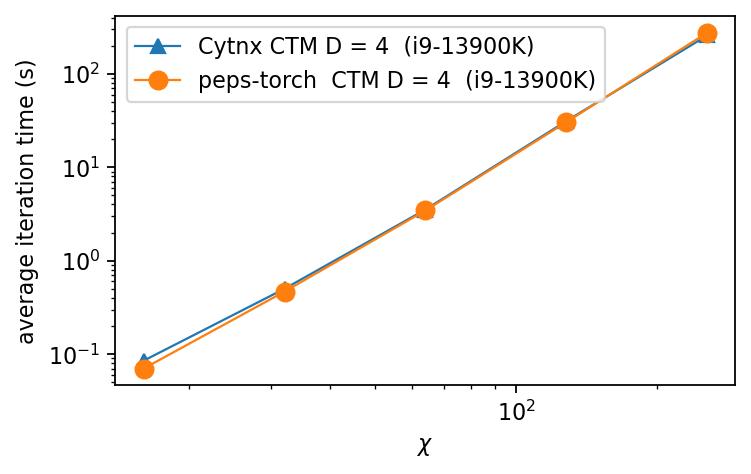

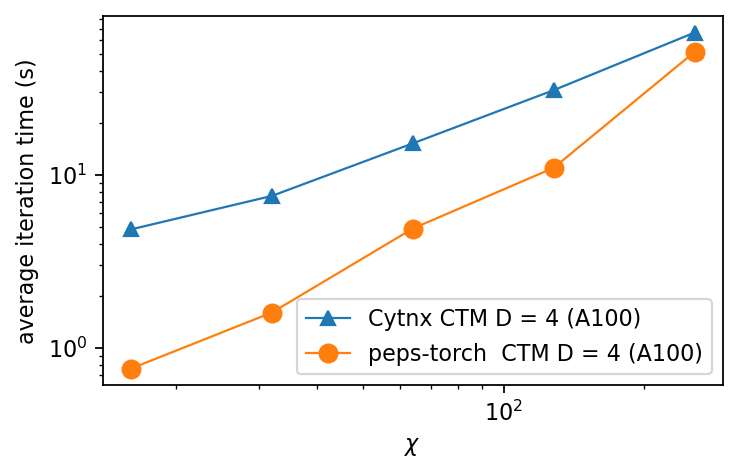

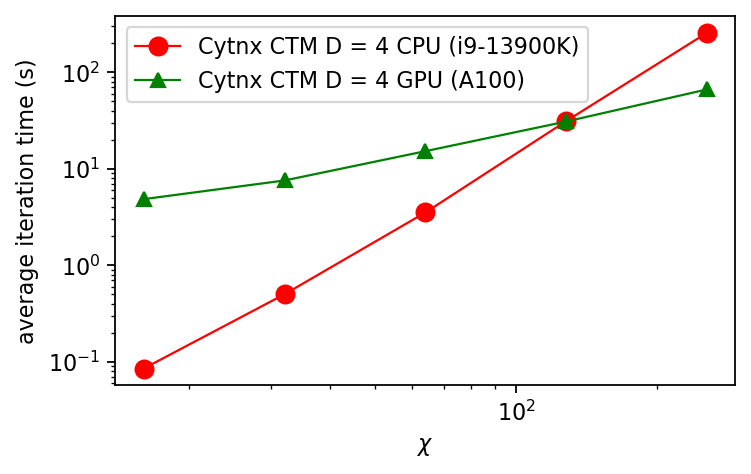

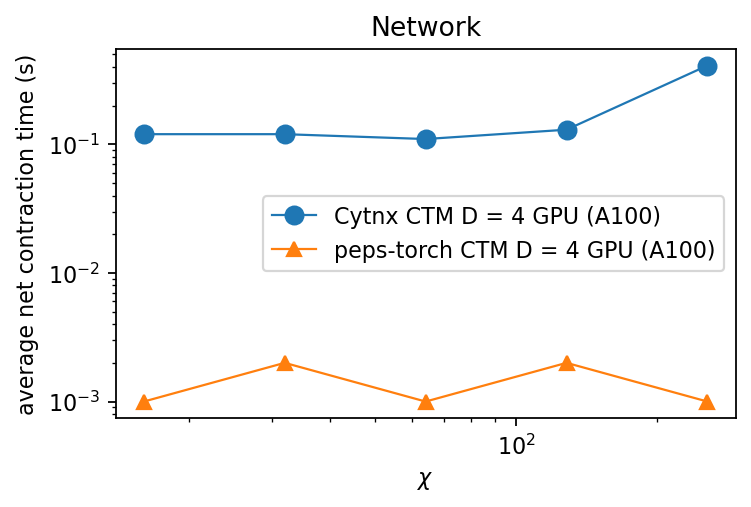

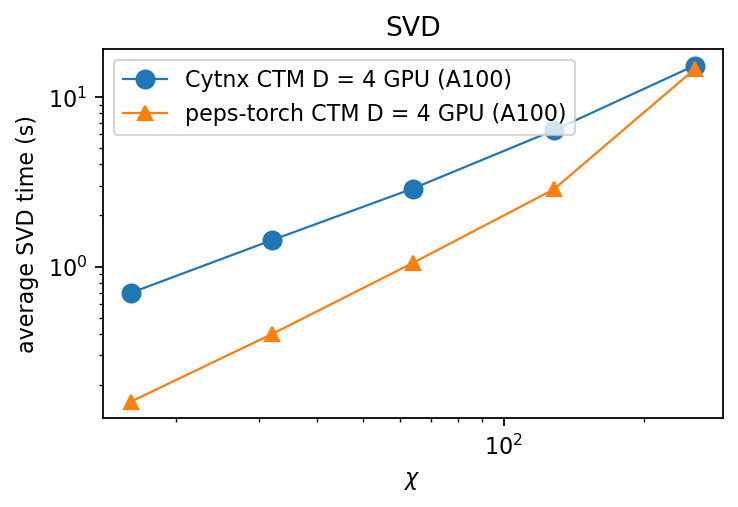

In [5]:
import matplotlib.pyplot as plt
import numpy as np
chi = [16,32,64,128,256]
chi_D2 = [16,32,64,128,256]

# complex128
cytnx_net_D4 = [ 0.002480572141706944, 0.06, 0.04, 0.24 , 1.30]
cytnx_svd_D4 = [ 0.009480572141706944, 0.008, 0.53, 5.50, 47.50]
cytnx_ctm_D4 = [ 0.85013613008894026 , 5.01 , 35.281761571997777 , 312.79, 2580.97]

# cytnx_net_D2 = [7.373280823230743e-058 ,0.00014453590847551823 ,0.00048653222620487213 ,0.0023731540422886615 , 0.015818132087588315   ]
# cytnx_ctm_D2 = [0.029253358719870448 ,0.07849376928061247 ,0.34478853712789714 , 1.9617679587099701 ,13.096749335993081 ]
# cytnx_ctm_D2_gpu = [0.029253358719870448 ,0.07849376928061247 ,0.34478853712789714 , 1.9617679587099701 ,11.896749335993081 ]

torch_net_D4 = [0.001, 0.006, 0.03, 0.24, 1.36]
torch_svd_D4 = [0.009, 0.06, 0.51, 5.33, 45.72]
torch_ctm_D4 = [0.70, 4.67, 34.49, 304.30, 2769.99]

# torch_net_D2 = [ 0.0006138780154287815, 0.0006959920283406973,  0.0007375609129667282, 0.0026979879476130016, 0.017176900058984756]
# torch_ctm_D2 = [0.050776669988408685, 0.09419820411130786, 0.3297925132792443, 1.8326073784846812, 12.534584653098136]



cytnx_net_D4_gpu = [ 0.12,  0.12, 0.11, 0.13, 0.41]
cytnx_svd_D4_gpu = [ 0.7,  1.43, 2.88, 6.35, 15.29 ]
cytnx_ctm_D4_gpu = [ 48.45,  75.67, 152.27, 309.24, 665.68] # 256: 785s? 

torch_net_D4_gpu = [ 0.001,  0.002, 0.001, 0.002, 0.001]
torch_svd_D4_gpu = [ 0.16,  0.40, 1.05, 2.85, 14.57]
torch_ctm_D4_gpu = [ 7.60,  16.022, 49.00, 110.03, 514.81] #256 : 329s


fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
plt.plot(chi, np.asarray(cytnx_ctm_D4)/10, markersize = 6,marker = '^',lw = 1,label = 'Cytnx CTM D = 4  (i9-13900K)')
plt.plot(chi, np.asarray(torch_ctm_D4)/10, markersize = 8,marker = 'o',lw = 1,label = 'peps-torch  CTM D = 4  (i9-13900K)')
plt.ylabel("average iteration time (s)")
plt.xlabel(r'$\chi$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()
plt.show()


fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
plt.plot(chi, np.asarray(cytnx_ctm_D4_gpu)/10, markersize = 6,marker = '^',lw = 1,label = 'Cytnx CTM D = 4 (A100)')
plt.plot(chi, np.asarray(torch_ctm_D4_gpu)/10, markersize = 8,marker = 'o',lw = 1,label = 'peps-torch  CTM D = 4 (A100)')
plt.ylabel("average iteration time (s)")
plt.xlabel(r'$\chi$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
plt.plot(chi, np.asarray(cytnx_ctm_D4)/10, markersize = 8,marker = 'o',lw = 1,label = 'Cytnx CTM D = 4 CPU (i9-13900K)', color = 'red')
plt.plot(chi, np.asarray(cytnx_ctm_D4_gpu)/10, markersize = 6,marker = '^',lw = 1,label = 'Cytnx CTM D = 4 GPU (A100)', color = 'green')
plt.ylabel("average iteration time (s)")
plt.xlabel(r'$\chi$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()
plt.show()

# fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
# plt.plot(chi, np.asarray(torch_ctm_D4)/10, markersize = 8,marker = 'o',lw = 1,label = 'peps-torch CTM D = 4 CPU (i9-13900K)', color = 'red')
# plt.plot(chi, np.asarray(torch_ctm_D4_gpu)/10, markersize = 6,marker = '^',lw = 1,label = 'peps-torch CTM D = 4 GPU (A100)', color = 'green')
# plt.ylabel("average iteration time (s)")
# plt.xlabel(r'$\chi$')
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.legend()
# plt.show()

fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
plt.title("Network")
plt.plot(chi, cytnx_net_D4_gpu, markersize = 8,marker = 'o',lw = 1,label = 'Cytnx CTM D = 4 GPU (A100)')
plt.plot(chi, torch_net_D4_gpu, markersize = 6,marker = '^',lw = 1,label = 'peps-torch CTM D = 4 GPU (A100)')
plt.ylabel("average net contraction time (s)")
plt.xlabel(r'$\chi$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(5,3), dpi = 160)
plt.title("SVD")
plt.plot(chi, cytnx_svd_D4_gpu, markersize = 8,marker = 'o',lw = 1,label = 'Cytnx CTM D = 4 GPU (A100)')
plt.plot(chi, torch_svd_D4_gpu, markersize = 6,marker = '^',lw = 1,label = 'peps-torch CTM D = 4 GPU (A100)')
plt.ylabel("average SVD time (s)")
plt.xlabel(r'$\chi$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.legend()
plt.show()